In [1]:
import sklearn.datasets as datasets
import pandas as pd

/Users/nafisaslam/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris=datasets.load_iris()

In [3]:
iris.columns=iris.feature_names

In [4]:
df_x=pd.DataFrame(iris.data)
df_y=pd.DataFrame(iris.target)

In [5]:
df_x2=df_x.copy()
df_x2["target"]=df_y

In [6]:
df_x2

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df_x2.isna().sum()

0         0
1         0
2         0
3         0
target    0
dtype: int64

In [8]:
df_x2.nunique()

0         35
1         23
2         43
3         22
target     3
dtype: int64

In [9]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(df_x, df_y, random_state=1)

In [11]:
dtmachine=DecisionTreeClassifier()

In [12]:
dtmachine.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [13]:
accuracy_score(ytest,dtmachine.predict(xtest))

0.9736842105263158

In [14]:
confusion_matrix(ytest,dtmachine.predict(xtest))

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [15]:
print(classification_report(ytest,dtmachine.predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



[Text(133.92000000000002, 199.32, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(167.40000000000003, 163.07999999999998, 'petal width (cm) <= 1.65\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(66.96000000000001, 126.83999999999999, 'petal length (cm) <= 4.95\ngini = 0.193\nsamples = 37\nvalue = [0, 33, 4]\nclass = versicolor'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(100.44000000000001, 90.6, 'petal width (cm) <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(133.92000000000002, 54.359999999999985, 'petal length (cm) <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicol

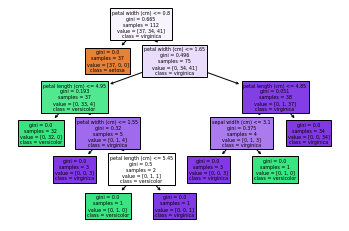

In [32]:

tree.plot_tree(dtmachine, filled=True, feature_names=iris.feature_names,
    class_names=iris.target_names,)

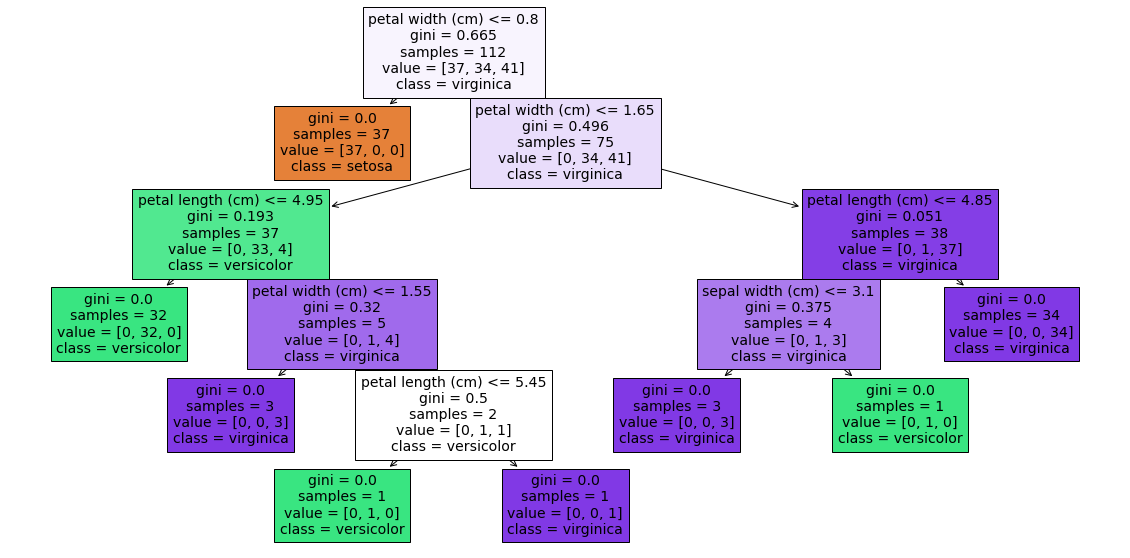

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(dtmachine, filled=True, feature_names=iris.feature_names,
    class_names=iris.target_names,)
plt.savefig("tree.pdf")